<a href="https://colab.research.google.com/github/RobinTeotia/LinearModels_Project/blob/main/Project_LinearModel_Automobiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Pre-processing

In [3]:
#Importing data 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as pp
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns
np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=np.inf)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_seq_items', 500)


In [5]:
#Reading the file
path="/content/drive/MyDrive/Linear_Model_Project/auto_clean.csv"
df=pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [6]:
df.describe(include= "all")

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
count,201.000000,201.00000,201,201,201,201,201,201,201.000000,201.000000,201.000000,201.000000,201.000000,201,201,201.000000,201,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,200,201.000000,201.000000
unique,NaN,NaN,22,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,6,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,toyota,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,32,165,115,94,118,198,NaN,NaN,NaN,NaN,NaN,145,157,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,0.915126,53.766667,2555.666667,NaN,NaN,126.875622,NaN,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,NaN,0.099502,0.900498
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,0.029187,2.447822,517.296727,NaN,NaN,41.546834,NaN,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,NaN,0.300083,0.300083
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,0.837500,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,NaN,0.000000,0.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,0.890278,52.000000,2169.000000,NaN,NaN,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,NaN,0.000000,1.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,0.909722,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,NaN,0.000000,1.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,0.925000,55.500000,2926.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,NaN,0.000000,1.000000


In [7]:
# Looking the columns of the data
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [9]:
#number of rows and columns in the data
df.shape


(201, 29)

In [10]:
df = pd.get_dummies(df)

In [11]:
df.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'diesel', 'gas',
       'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'aspiration_std', 'aspiration_turbo', 'num-of-doors_four',
       'num-of-doors_two', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-location_front', 'engine-location_rear', 'engine-type_do

In [12]:
df.dropna(inplace=True)# group by make/company then average
df.shape

(197, 79)

In [13]:
x = df.drop(['price'],axis=1)
y = df['price']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

#Multiple Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

print("slope:", reg.coef_[0])
print("intercept", reg.intercept_)

# Algorith Performance
y_pred = reg.predict(x_test)
print("r2: ", metrics.r2_score(y_test,y_pred))
print("mean square error: ", metrics.mean_squared_error(y_test,y_pred))

slope: -824.4483442102446
intercept 199.98922600047445
r2:  0.9303454746172529
mean square error:  4346166.515350741


In [16]:
from statsmodels.api import OLS
OLS(y_train,x_train).fit().summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     64.27
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           2.09e-57
Time:                        20:06:50   Log-Likelihood:                -1342.3
No. Observations:                 157   AIC:                             2807.
Df Residuals:                      96   BIC:                             2993.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
symboling                 -824.4483    288.869     -2.854      0.005   -1397.849    -251.048
normalized-losses          -16.8532      8.285     -2.034      0.045     -33.299      -0.407
wheel-base                 195.9562     98.906      1.981      0.050      -0.371     392.283
length                   -2.533e+04   1.19e+04     -2.123      0.036    -4.9e+04   -1644.433
width                     1.206e+04   1.97e+04      0.612      0.542   -2.71e+04    5.12e+04
height                    -634.8488    193.406     -3.282      0.001   -1018.757    -250.941
curb-weight                 11.0862      2.469      4.491      0.000       6.186      15.986
engine-size                 95.3944     27.876      3.422      0.001      40.060     150.728
bore                     -5404.4899   1961.460     -2.755      0.007   -9297.957   -1511.023
stroke                    1031.2477   1232.025      0.837      0.405   -1414.303    3476.798
compression-ratio         -607.8614    541.148     -1.123      0.264   -1682.032     466.309
horsepower                -106.9236     36.454     -2.933      0.004    -179.284     -34.563
peak-rpm                     3.2479      0.847      3.837      0.000       1.568       4.928
city-mpg                   290.0954    191.132      1.518      0.132     -89.299     669.490
highway-mpg                 83.3176    128.601      0.648      0.519    -171.954     338.589
city-L/100km              1455.0837    496.258      2.932      0.004     470.020    2440.147
diesel                    1756.4895   3820.699      0.460      0.647   -5827.539    9340.518
gas                      -1698.1772   4022.310     -0.422      0.674   -9682.398    6286.044
make_alfa-romero          1152.6023   1797.475      0.641      0.523   -2415.358    4720.562
make_audi                 6604.8905   1870.386      3.531      0.001    2892.204    1.03e+04
make_bmw                  8420.9870   1705.446      4.938      0.000    5035.703    1.18e+04
make_chevrolet           -4012.7055   1814.125     -2.212      0.029   -7613.714    -411.697
make_dodge               -4382.2898    961.067     -4.560      0.000   -6289.992   -2474.588
make_honda               -3020.7156   1923.069     -1.571      0.120   -6837.978     796.547
make_isuzu               -5421.4581   2025.586     -2.676      0.009   -9442.215   -1400.701
make_jaguar              -5650.4624   3045.490     -1.855      0.067   -1.17e+04     394.787
make_mazda                 812.9287    802.182      1.013      0.313    -779.389    2405.246
make_mercedes-benz        6078.5112   1953.417      3.112      0.002    2201.009    9956.013
make_mercury               516.3786   2370.108      0.218      0.828   -4188.248    5221.005
make_mitsubishi          -3760.4741    939.491     -4.003      0.000   -5625.348   -1895.600
make_nissan   

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


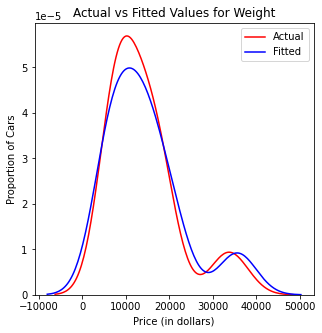

In [17]:
#Plotting the actual and the predicted values.
width = 5
height = 5
plt.figure(figsize=(width, height))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.gca().legend(("Actual","Fitted"))
plt.title('Actual vs Fitted Values for Weight')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [18]:
n=list(range(1,70))
rsq=[]
for i in  n:
  from sklearn import linear_model
  reg = linear_model.Lars(n_nonzero_coefs=i, normalize=False)
  reg.fit(x_train, y_train)
  # Algorith Performance
  y_pred = reg.predict(x_test)
  #print("r2: ", metrics.r2_score(y_test,y_pred))
  #print("mean square error: ", metrics.mean_squared_error(y_test,y_pred))
  rsq.append(metrics.r2_score(y_test,y_pred))
  


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 56 iterations, i.e. alpha=1.742e+01, with an active set of 47 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 56 iterations, i.e. alpha=1.742e+01, with an active set of 47 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 56 iterations, i.e. alpha=1.742e+01, with an active set of 47 regressors, and the smallest cholesky pivot el

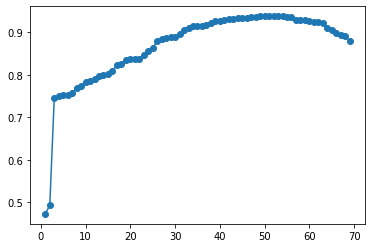

In [19]:
fig = plt.figure()
plt.plot(n, rsq, '-')
plt.scatter(n,rsq)

#RFE

In [20]:
input=df.describe().columns.to_list()# saving all the columns
var=df[input]
var=var.drop(['price'],axis=1)# taking all predictors.
x=var.values
y=df['price'].values # defining target

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# Train/test set generation
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=1121218
)

# Scale train and test sets with StandardScaler
X_train_std = pp.StandardScaler().fit_transform(X_train)
X_test_std = pp.StandardScaler().fit_transform(X_test)

# Fix the dimensions of the target array
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Init, fit, test Lasso Regressor
#forest = RandomForestRegressor()
forest=DecisionTreeRegressor()
_ = forest.fit(X_train_std, y_train)
forest.score(X_test_std, y_test)

0.7527471054678347

In [22]:
#Printing the features and Weight.
pd.DataFrame(
    zip(var.columns, abs(forest.feature_importances_)),
    columns=["feature", "weight"],
).sort_values("weight").reset_index(drop=True)

,feature,weight
0,make_volkswagen,0.000000e+00
1,engine-type_dohc,0.000000e+00
2,make_jaguar,0.000000e+00
3,make_mercedes-benz,0.000000e+00
4,make_mercury,0.000000e+00
5,make_mitsubishi,0.000000e+00
6,make_nissan,0.000000e+00
7,make_peugot,0.000000e+00
8,make_porsche,0.000000e+00
9,engine-type_l,0.000000e+00


In [23]:
#Listing the best features.
from sklearn.feature_selection import RFE
rfe = RFE(estimator=DecisionTreeRegressor(),#RandomForestRegressor(), 
          n_features_to_select=5, step=1)
_ = rfe.fit(X_train_std, y_train)

print(var.columns[rfe.support_])
slctd_features=var.columns[rfe.support_].to_list()# BMW is an otlier

Index(['wheel-base', 'curb-weight', 'engine-size', 'make_bmw',
       'engine-type_ohc'],
      dtype='object')


In [24]:
slctd_features

['wheel-base', 'curb-weight', 'engine-size', 'make_bmw', 'engine-type_ohc']

In [25]:
x = df[slctd_features]


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [27]:
reg.fit(x_train, y_train)

print("slope:", reg.coef_[0])
print("intercept", reg.intercept_)

# Algorith Performance
y_pred = reg.predict(x_test)
print("r2: ", metrics.r2_score(y_test,y_pred))
print("mean square error: ", metrics.mean_squared_error(y_test,y_pred))

slope: 39.60594557778924
intercept -18552.612300848086
r2:  0.7406843903888931
mean square error:  16180267.01361624


#PCA

In [28]:
x = df.drop(['price'],axis=1)
y = df['price']
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
# Scale train and test sets with StandardScaler
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

In [29]:
from sklearn.decomposition import PCA
pca = PCA(3)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [30]:
pca.components_

array([[-5.65361099e-04, -5.33983793e-03,  8.00026707e-03,  8.31112638e-05,  4.26253736e-05,  1.49982875e-03,  8.20045987e-01,  5.84565769e-02,  3.01002516e-04,  7.16711857e-05,  2.48140417e-03,  3.67062748e-02, -5.67942552e-01, -6.13687275e-03, -7.32107016e-03,  2.64028746e-03,  2.15890080e-04, -2.15890080e-04,  8.76758462e-06, -5.43296962e-06,  3.03322567e-05, -3.14219271e-05, -9.45513826e-05, -1.26380150e-04,  4.57092604e-06,  5.46890439e-05, -1.48152444e-05,  2.11948223e-04,  7.45516610e-06, -5.84493352e-05, -5.48343544e-05,  1.07717256e-04, -4.45020719e-05, -5.14663208e-06, -1.07489144e-06,  2.98692885e-06,  1.57242329e-06, -1.12539677e-05, -3.15068194e-05,  4.93299386e-05, -2.18980991e-04,  2.18980991e-04,  1.98886499e-04, -1.98886499e-04,  3.22138925e-05,  5.44314723e-05, -2.56194392e-04,  9.56733888e-05,  7.38756381e-05,  1.32572572e-05, -5.18081490e-04,  5.04824233e-04,  4.63852657e-06, -4.63852657e-06,  6.18166787e-06,  9.02062449e-05, -2.64717527e-04, -3.06610328e-06,  1.713

In [31]:
len(pca.components_)

3

In [32]:
pca.explained_variance_ratio_

array([0.64925063, 0.34730002, 0.00177779])

In [33]:
reg.fit(x_train, y_train)

print("slope:", reg.coef_[0])
print("intercept", reg.intercept_)

# Algorith Performance
y_pred = reg.predict(x_test)
print("r2: ", metrics.r2_score(y_test,y_pred))
print("mean square error: ", metrics.mean_squared_error(y_test,y_pred))

slope: 10.521087650315689
intercept 13013.71974522293
r2:  0.5127476022698225
mean square error:  30402619.84275602


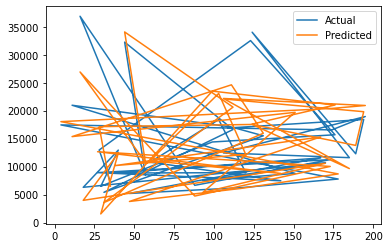

In [34]:
cdf=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
cdf.plot()

#PLS

In [35]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=4)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
pls.fit(x_train, y_train)
y_pred = pls.predict(x_test)
print("r2: ", metrics.r2_score(y_test,y_pred))
print("mean square error: ", metrics.mean_squared_error(y_test,y_pred))

r2:  0.9411228314777136
mean square error:  3673702.1312560095


In [37]:
import matplotlib.pyplot as plt
import numpy as np

PCR and PLS Comparison

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


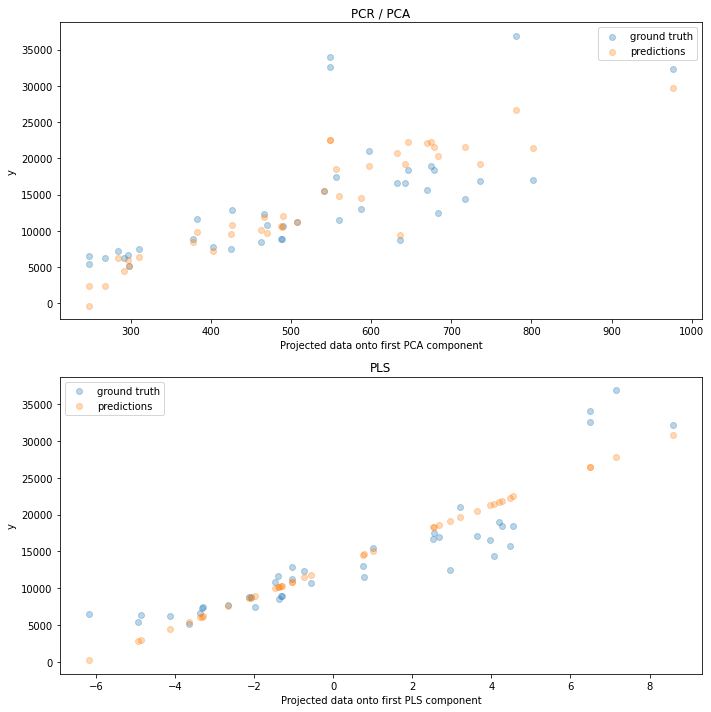

In [38]:
from sklearn.pipeline import make_pipeline
pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(x_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(x_train, y_train)

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes[0].scatter(pca.transform(x_test), y_test, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca.transform(x_test), pcr.predict(x_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(x_test), y_test, alpha=0.3, label="ground truth")
axes[1].scatter(
    pls.transform(x_test), pls.predict(x_test), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()

In [39]:
x = np.linspace(0,5,5)

In [40]:
x

array([0.  , 1.25, 2.5 , 3.75, 5.  ])

In [41]:
n=list(range(1,15))
r=[]
mse=[]
for i in n:
  from sklearn.cross_decomposition import PLSRegression
  pls = PLSRegression(n_components=i)
  x = df.drop(['price'],axis=1)
  y = df['price']
  from sklearn.model_selection import train_test_split
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
  pls.fit(x_train, y_train)
  y_pred = pls.predict(x_test)
  r.append(metrics.r2_score(y_test,y_pred))
  mse.append(metrics.mean_squared_error(y_test,y_pred))
  print("r2: ", metrics.r2_score(y_test,y_pred))
  print("mean square error: ", metrics.mean_squared_error(y_test,y_pred))
  


r2:  0.8043726820642546
mean square error:  12206369.852184879
r2:  0.8905862948657406
mean square error:  6826981.86459488
r2:  0.9311003584856059
mean square error:  4299064.751702418
r2:  0.9411228314777136
mean square error:  3673702.1312560095
r2:  0.9427076619269037
mean square error:  3574814.9879881563
r2:  0.9398945470945923
mean square error:  3750342.212111009
r2:  0.9407690266726074
mean square error:  3695778.149841638
r2:  0.9402860804159778
mean square error:  3725912.083534303
r2:  0.9387316063207386
mean square error:  3822905.1105427444
r2:  0.9353991939774472
mean square error:  4030834.442659647
r2:  0.937733179859329
mean square error:  3885202.9674411165
r2:  0.9364101631284764
mean square error:  3967753.971604655
r2:  0.9332930091081634
mean square error:  4162252.0369038135
r2:  0.9357196155940644
mean square error:  4010841.4028207636


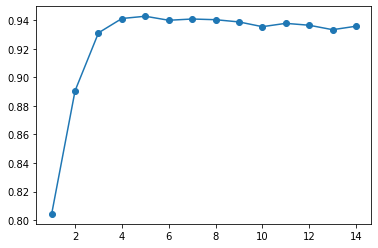

In [42]:
fig = plt.figure()
plt.plot(n, r, '-')
plt.scatter(n,r)
#plt.plot(n, mse, '--')

In [43]:
n=list(range(1,15))
rsquare=[]
for i in n:
  from sklearn.pipeline import make_pipeline
  x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
  pcr = make_pipeline(StandardScaler(), PCA(n_components=i), LinearRegression())
  pcr.fit(x_train, y_train)
  rsquare.append(pcr.score(x_test, y_test))

In [44]:
rsquare

[0.7163681386366901,
 0.7400507914271465,
 0.7391099054388921,
 0.7720895594130763,
 0.798720405558577,
 0.8053549636128303,
 0.8182438099203516,
 0.8180556857824621,
 0.8264946683496812,
 0.8287319600826553,
 0.8247071058827344,
 0.8229033788853533,
 0.822236753175023,
 0.8238357066673248]

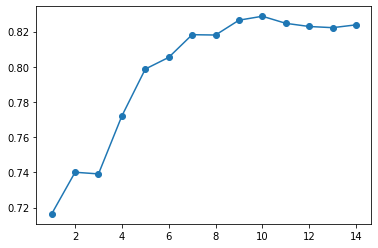

In [45]:
fig = plt.figure()
plt.plot(n, rsquare, '-')
plt.scatter(n,rsquare)